In [1]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt
import emcee
import sys
%matplotlib inline

In [2]:
logger = phoebe.logger()

In [3]:
b = phoebe.default_binary()

In [4]:
b.add_constraint('semidetached', 'primary')

<ParameterSet: 1 parameters>

In [5]:
b.add_constraint('semidetached', 'secondary')

<ParameterSet: 1 parameters>

In [6]:
b['requiv@constraint@primary']

<ConstraintParameter: {requiv@primary@component} = 1.000000 * {requiv_max@primary@component} (solar units) => 2.013275176537638 solRad>

In [7]:
#b['period@orbit'] = 0.5
b['sma@orbit'] = 6
b['incl@orbit'] = 78
b['q@binary'] = 0.44
#b['requiv@primary'] = 1.2
#b['requiv@secondary'] = 0.8
b['teff@primary'] = 5660.
b['teff@secondary'] = 5656.

In [8]:
#b['requiv@constraint@primary']

In [9]:
b.add_dataset('lc', times=np.linspace(0, 1, 151))

<ParameterSet: 78 parameters | contexts: dataset, constraint, figure, compute>

In [10]:
b.add_dataset('mesh', times=[0.25])

Thu, 08 Oct 2020 23:33 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 85 parameters | contexts: dataset, constraint, figure, compute>

In [11]:
b.run_compute(irrad_method = 'none')

100%|██████████| 152/152 [00:05<00:00, 29.90it/s]


<ParameterSet: 13 parameters | kinds: mesh, lc>

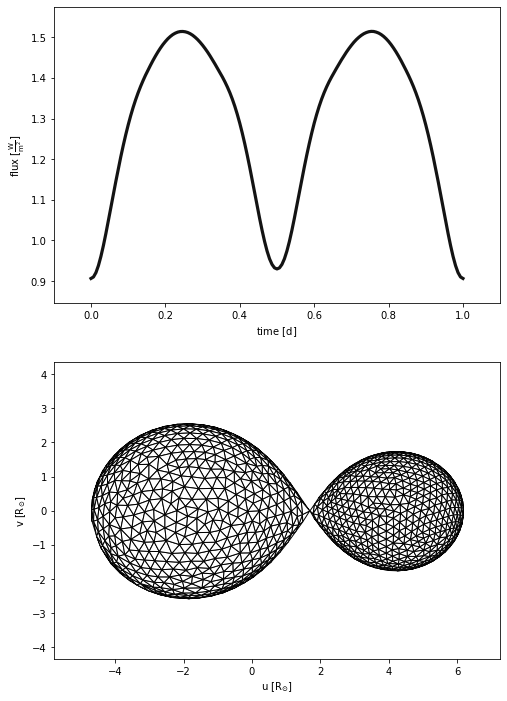

(<autofig.figure.Figure | 2 axes | 3 call(s)>,
 <Figure size 576x864 with 2 Axes>)

In [12]:
b.plot(show=True)

In [13]:
ls

adddata.py    funcfit.ipynb  licurdata.ipynb  v737per.B
dxcode.ipynb  jieguidata.py  mcmclc.ipynb     未命名.ipynb


In [14]:
np.savetxt('data.lc', 
           np.vstack((b['value@times@lc01@model'], b['value@fluxes@lc01@model']+np.random.normal(0, 0.01, 151))).T)